## You are working as a Data Analyst for a health insurance company.
 The company provides insurance policies to thousands of customers every year. Recently, management observed that insurance claim costs are increasing, but they are not sure which customer factors are driving the cost the most.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("insurance.csv")

# Target variable (company cost)
y = df['charges']

# Input variables (customer risk factors)
X = df.drop('charges', axis=1)

print("Target Variable:")
print(y.name)

print("\nInput Variables:")
print(X.columns.tolist())


Target Variable:
charges

Input Variables:
['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [2]:
# Dataset overview
print(df.head())
print(df.info())
print(df.describe())

# Separate numeric & categorical columns
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

print("\nNumeric Columns:", numeric_cols.tolist())
print("Categorical Columns:", categorical_cols.tolist())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [3]:
# Binary encoding
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# One-hot encoding for region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

print("Encoded Dataset:")
print(df.head())


Encoded Dataset:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [4]:
from sklearn.preprocessing import StandardScaler

# Separate X and y
X = df.drop('charges', axis=1)
y = df['charges']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Features Sample:")
print(X_scaled.head())


Scaled Features Sample:
        age       sex       bmi  children    smoker  region_northwest  \
0 -1.438764 -1.010519 -0.453320 -0.908614  1.970587         -0.566418   
1 -1.509965  0.989591  0.509621 -0.078767 -0.507463         -0.566418   
2 -0.797954  0.989591  0.383307  1.580926 -0.507463         -0.566418   
3 -0.441948  0.989591 -1.305531 -0.908614 -0.507463          1.765481   
4 -0.513149  0.989591 -0.292556 -0.908614 -0.507463          1.765481   

   region_southeast  region_southwest  
0         -0.611324          1.765481  
1          1.635795         -0.566418  
2          1.635795         -0.566418  
3         -0.611324         -0.566418  
4         -0.611324         -0.566418  


In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_scaled.values, i)
    for i in range(X_scaled.shape[1])
]

print("VIF Scores:")
print(vif_data)


VIF Scores:
            Feature       VIF
0               age  1.016822
1               sex  1.008900
2               bmi  1.106630
3          children  1.004011
4            smoker  1.012074
5  region_northwest  1.518823
6  region_southeast  1.652230
7  region_southwest  1.529411


Dataset shape: (1338, 7)

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Numeric columns: ['age', 'bmi', 'children', 'charges']
Categorical columns: ['sex', 'smoker', 'region']

VIF Values:
             Feature       VIF
0               age  1.016822
1               sex  1.008900
2               bmi  1.106630
3          children  1.004011
4            smoker  1.012074
5  region_northwest  1.518823
6  region_southeast  1.652230
7  region_southwest  1.529411

Linear Regression Results
MSE: 33596915.85136148
R2 Score: 0.7835929767120722

Ridge Regression Results
MSE: 33604956.54337762
R2 Score: 0.783541184391846


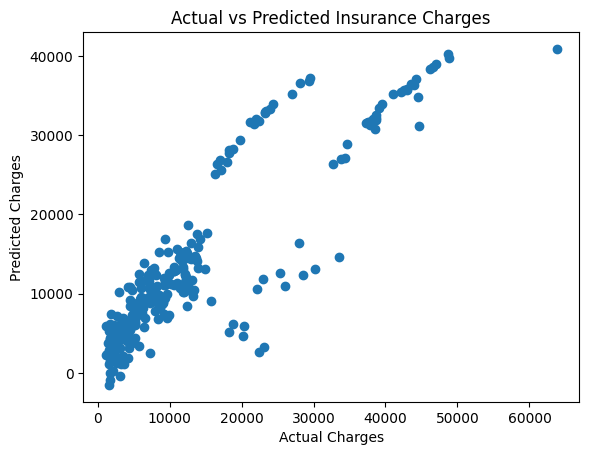

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
df = pd.read_csv("insurance.csv")

# -------------------------------
# Task 2: Data Inspection
# -------------------------------
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nNumeric columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

# -------------------------------
# Task 3: Data Cleaning & Encoding
# -------------------------------
df["sex"] = df["sex"].map({"male":1, "female":0})
df["smoker"] = df["smoker"].map({"yes":1, "no":0})
df = pd.get_dummies(df, columns=["region"], drop_first=True)

# Features & target
X = df.drop("charges", axis=1)
y = df["charges"]

# -------------------------------
# Task 4: Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Task 5: Multicollinearity Check (VIF)
# -------------------------------
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\nVIF Values:\n", vif_data)

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -------------------------------
# Model Training (Linear Regression)
# -------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("\nLinear Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# -------------------------------
# Ridge Regression (Fix Multicollinearity)
# -------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)


print("\nRidge Regression Results")
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R2 Score:", r2_score(y_test, ridge_pred))


# -------------------------------
# Visualization: Actual vs Predicted
# -------------------------------
plt.scatter(y_test, ridge_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()

## POLYNOMIAL REGRESSION

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
path='Position_Salaries.csv'
# Importing the dataset
dataset = pd.read_csv(path)
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values
 
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())
 

Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
 # Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 

LinearRegression()

In [4]:

# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("✅ Models Trained Successfully!")
 

✅ Models Trained Successfully!


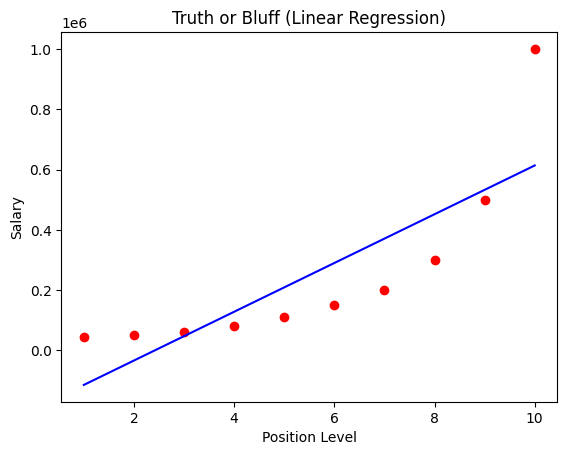

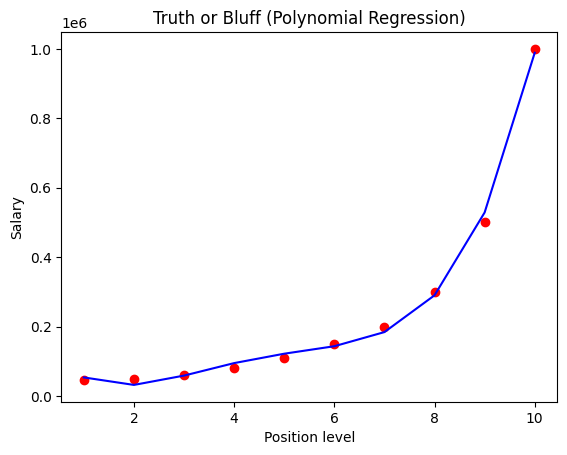

C:\Users\Sri Chethan\AppData\Local\Temp\ipykernel_13752\2517845231.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


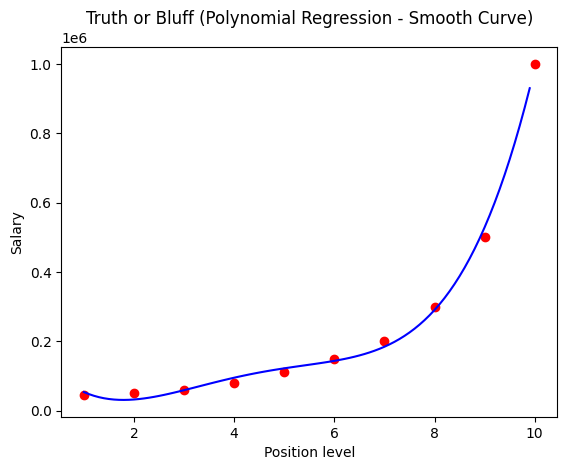

Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [158862.45265155]


In [ ]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)
 
 